In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
engine = create_engine("postgresql:///apartment_history?host=localhost&port=5432")

with engine.connect() as conn, conn.begin():
    df = pd.read_sql_table("availabilities", conn)

In [3]:
df

,id,apartment,plan,unit,bedrooms,beds,baths,sqft,rent,available_date,retrieved
0,1,NEMA Chicago,,3805,Studio,0.0,1.0,585.0,2446.0,2024-07-02,2024-07-02 13:14:54.486642
1,2,NEMA Chicago,,216,Studio,0.0,1.0,402.0,2143.0,2024-09-24,2024-07-02 13:14:54.486642
2,3,NEMA Chicago,,2608,1,1.0,1.0,596.0,2727.0,2024-07-02,2024-07-02 13:14:54.486642
3,4,NEMA Chicago,,817,1,1.0,1.0,590.0,2486.0,2024-07-24,2024-07-02 13:14:54.486642
4,5,NEMA Chicago,,4404,1,1.0,1.0,586.0,2446.0,2024-08-13,2024-07-02 13:14:54.486642
...,...,...,...,...,...,...,...,...,...,...,...
4448,4449,NEMA Chicago,,5803,3,3.0,3.0,1743.0,7366.0,2024-08-05,2024-07-25 15:29:55.221453
4449,4450,NEMA Chicago,,5303,3,3.0,3.0,1809.0,7288.0,2024-08-14,2024-07-25 15:29:55.221453
4450,4451,NEMA Chicago,,7400,3,3.0,3.0,1565.0,7497.0,2024-08-18,2024-07-25 15:29:55.221453
4451,4452,NEMA Chicago,,5403,3,3.0,3.0,1809.0,7314.0,2024-11-25,2024-07-25 15:29:55.221453


In [4]:
df.to_csv(".output/availabilities.csv", index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453 entries, 0 to 4452
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              4453 non-null   int64         
 1   apartment       4453 non-null   object        
 2   plan            4453 non-null   object        
 3   unit            4453 non-null   object        
 4   bedrooms        4453 non-null   object        
 5   beds            4453 non-null   float64       
 6   baths           4453 non-null   float64       
 7   sqft            4453 non-null   float64       
 8   rent            4439 non-null   float64       
 9   available_date  4453 non-null   datetime64[ns]
 10  retrieved       4453 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 382.8+ KB


## availability

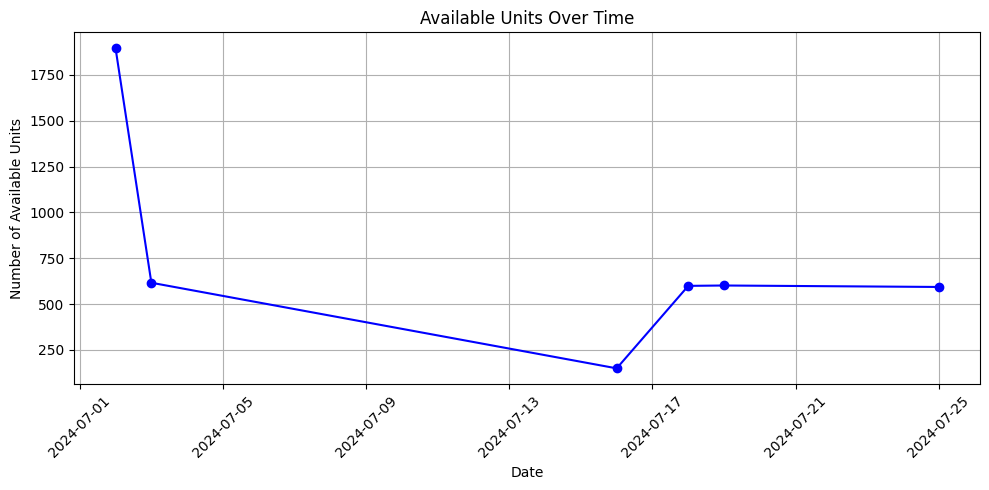

In [6]:
# availability over time
df['retrieved_date'] = pd.to_datetime(df['retrieved'])

# 1. Plot available units over time, based on retrieved date
available_units_over_time = df['retrieved_date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 5))
available_units_over_time.plot(kind='line', marker='o', color='b')
plt.title('Available Units Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Available Units')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# availability today

# 1. how many available apartments for each apartment today
df_today = df[df['retrieved'].dt.date == pd.Timestamp.today().date()]

print(df_today['apartment'].value_counts())
# df_today['apartment'].value_counts().to_csv('apartment_count.csv')

print('=====================')
# 2. how many available apartments for each apartment within certain days
df_now = df_today[df_today['available_date'] <= pd.Timestamp.today().date()+pd.DateOffset(5)]
print(df_now['apartment'].value_counts())


print('=====================')
# 3. how many available units for each number of bedrooms
print(df_now['beds'].value_counts())

apartment
1000M            413
ELLE              49
Eleven 30         44
NEMA Chicago      24
Eleven 40         23
Grand Central     23
LINEA             17
Name: count, dtype: int64
apartment
1000M            189
ELLE               9
Grand Central      9
Eleven 40          7
Eleven 30          6
LINEA              6
NEMA Chicago       2
Name: count, dtype: int64
beds
0.0    129
1.0     47
2.0     41
1.5     10
3.0      1
Name: count, dtype: int64


/var/folders/zf/8mdv24fj7rj9jlfy92gy1klc0000gn/T/ipykernel_87797/409425359.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_today, x='apartment', y='beds', estimator=len, ci=None, hue='beds')


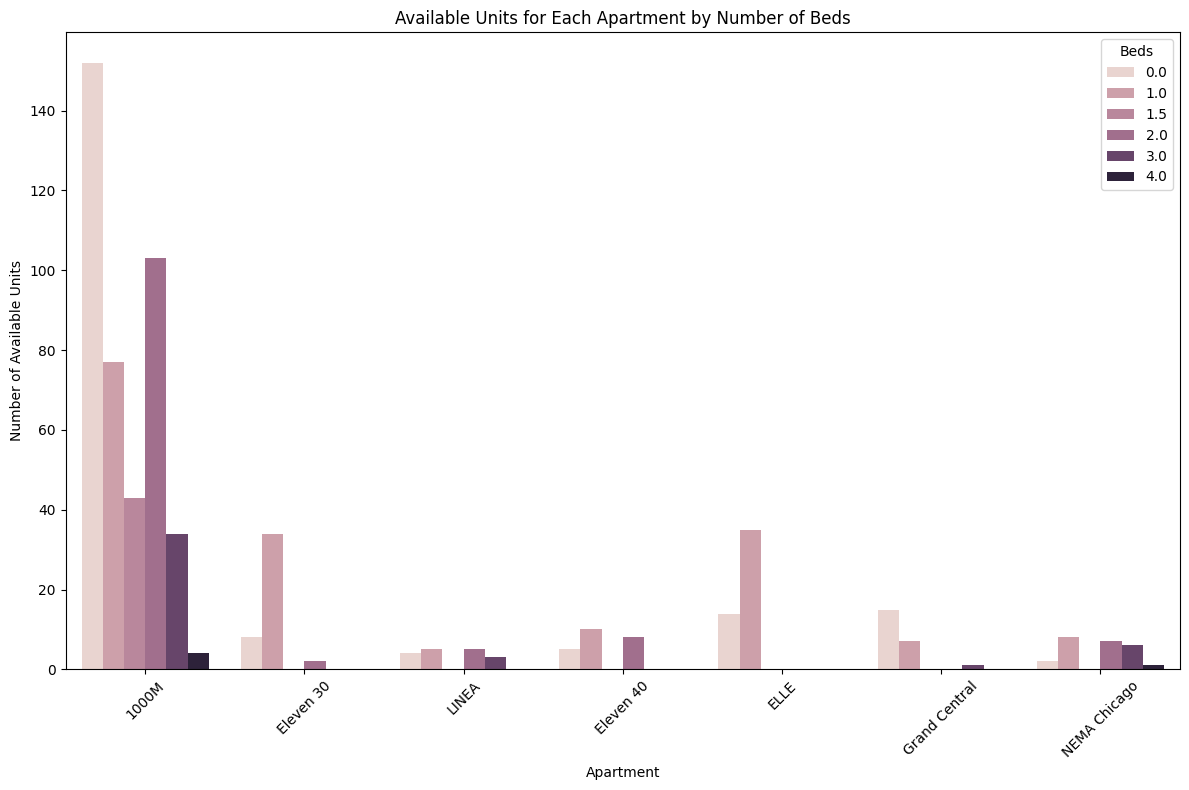

In [8]:
# 2. Plot available units for each apartment and beds
available_units_per_apartment_beds = df_today.groupby(['apartment', 'beds']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 8))
# available_units_per_apartment_beds.plot(kind='bar', stacked=False)
sns.barplot(data=df_today, x='apartment', y='beds', estimator=len, ci=None, hue='beds')
plt.title('Available Units for Each Apartment by Number of Beds')
plt.xlabel('Apartment')
plt.ylabel('Number of Available Units')
plt.xticks(rotation=45)
plt.legend(title='Beds')
plt.tight_layout()
plt.show()


## price

apartment      beds
1000M          0.0      2715.065789
               1.0      3760.324675
               1.5      4598.372093
               2.0      6345.339806
               3.0      9924.558824
               4.0     14830.000000
ELLE           0.0      1986.142857
               1.0      2659.542857
Eleven 30      0.0      1862.250000
               1.0      2435.090909
               2.0      3480.500000
Eleven 40      0.0      2092.666667
               1.0      2563.222222
               2.0      4677.833333
Grand Central  0.0      2157.466667
               1.0      2727.000000
               3.0      5055.000000
LINEA          0.0      2452.500000
               1.0      3151.500000
               2.0      3815.600000
               3.0      5261.666667
NEMA Chicago   0.0      2409.500000
               1.0      3037.750000
               2.0      4388.714286
               3.0      7392.166667
               4.0     12900.000000
Name: rent, dtype: float64


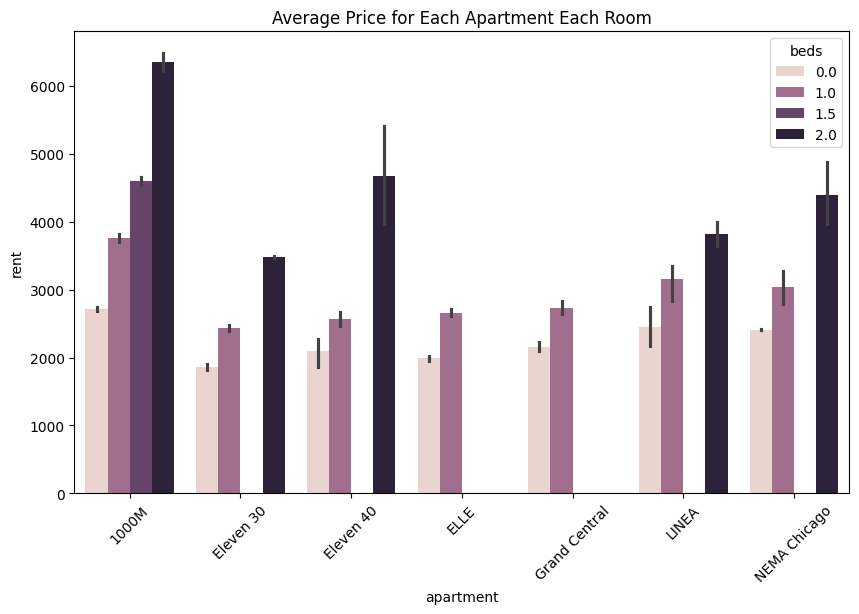

In [9]:
# price

# 4. average price for each apartment each room
print(df_today.groupby(['apartment', 'beds'])['rent'].mean())

# plot each partment's price for each room, limit beds to 0, 1, 2
plt.figure(figsize=(10, 6))
sns.barplot(x='apartment', y='rent', hue='beds', data=df_today[df_today['beds'].isin([0, 1, 1.5, 2])])
plt.xticks(rotation=45)
plt.title('Average Price for Each Apartment Each Room')
plt.show()


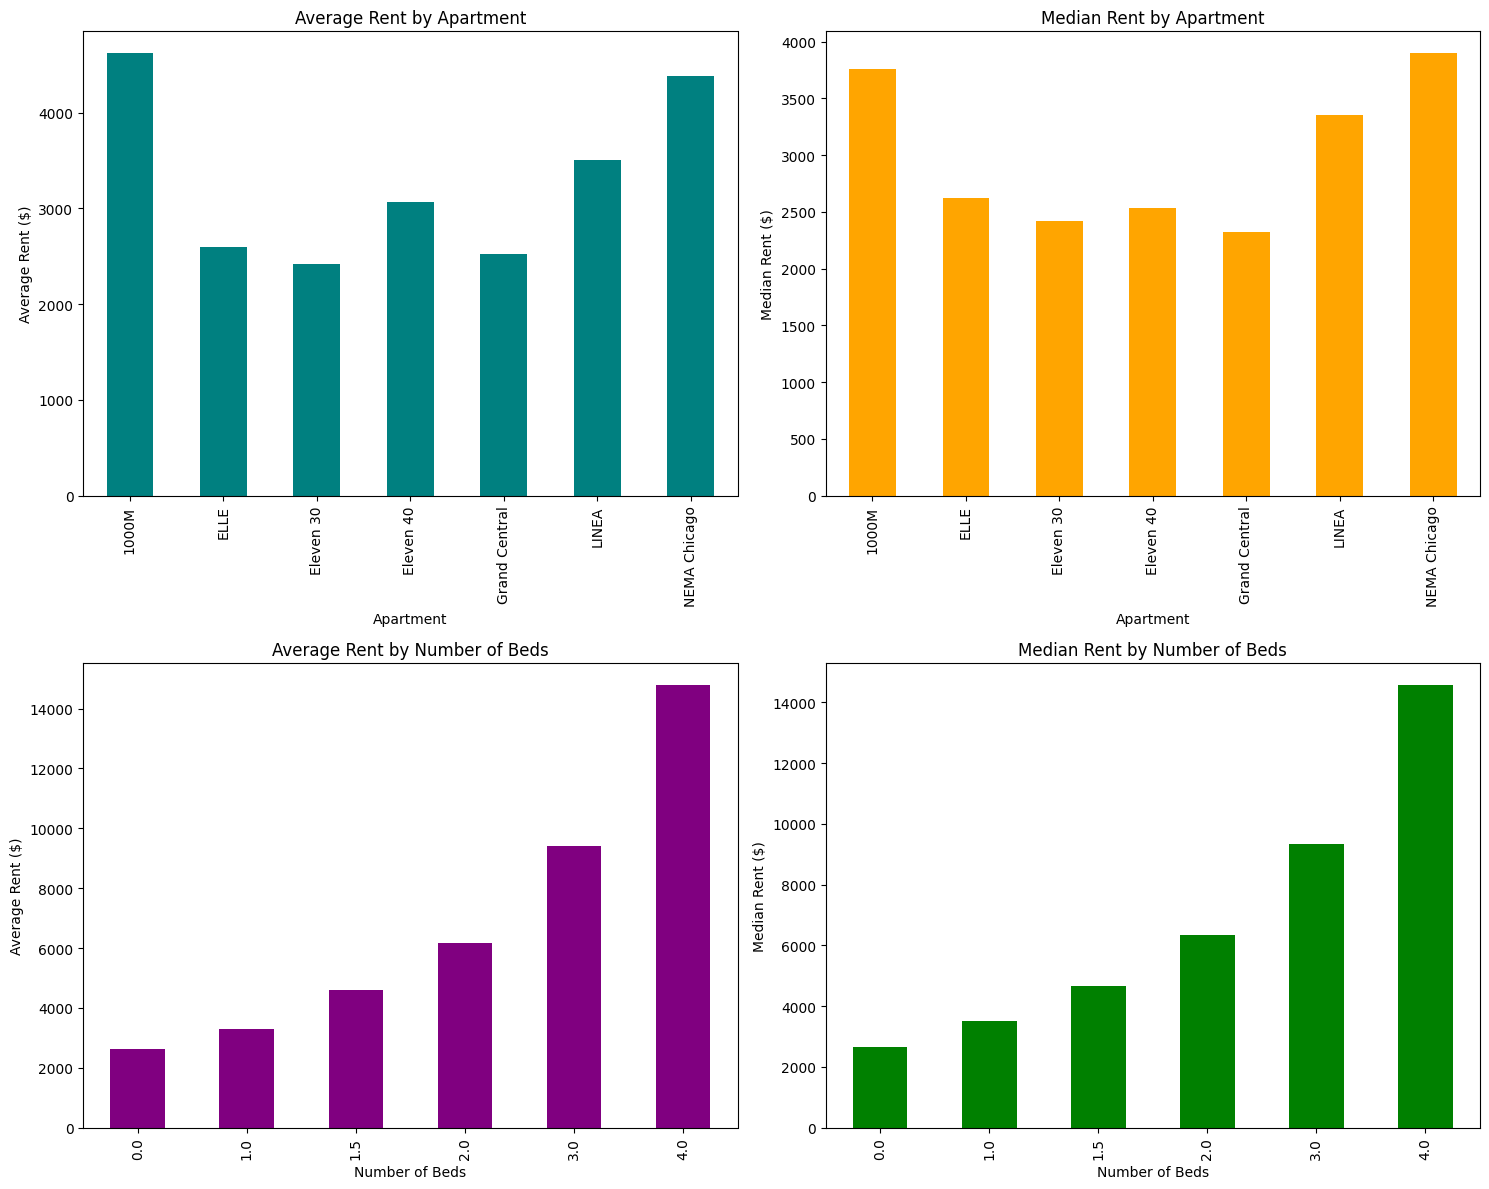

(4295.029285875197, 3545.0)

In [10]:
# 3. Average and Median Rent Overall, Each Apartment, Each Beds
# Calculate overall average and median rent
overall_avg_rent = df['rent'].mean()
overall_median_rent = df['rent'].median()

# Average and median rent by apartment
avg_rent_by_apartment = df.groupby('apartment')['rent'].mean()
median_rent_by_apartment = df.groupby('apartment')['rent'].median()

# Average and median rent by beds
avg_rent_by_beds = df.groupby('beds')['rent'].mean()
median_rent_by_beds = df.groupby('beds')['rent'].median()

# Creating plots for average and median rents by apartment and beds
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Average Rent by Apartment
avg_rent_by_apartment.plot(kind='bar', ax=ax[0, 0], color='teal')
ax[0, 0].set_title('Average Rent by Apartment')
ax[0, 0].set_xlabel('Apartment')
ax[0, 0].set_ylabel('Average Rent ($)')

# Median Rent by Apartment
median_rent_by_apartment.plot(kind='bar', ax=ax[0, 1], color='orange')
ax[0, 1].set_title('Median Rent by Apartment')
ax[0, 1].set_xlabel('Apartment')
ax[0, 1].set_ylabel('Median Rent ($)')

# Average Rent by Beds
avg_rent_by_beds.plot(kind='bar', ax=ax[1, 0], color='purple')
ax[1, 0].set_title('Average Rent by Number of Beds')
ax[1, 0].set_xlabel('Number of Beds')
ax[1, 0].set_ylabel('Average Rent ($)')

# Median Rent by Beds
median_rent_by_beds.plot(kind='bar', ax=ax[1, 1], color='green')
ax[1, 1].set_title('Median Rent by Number of Beds')
ax[1, 1].set_xlabel('Number of Beds')
ax[1, 1].set_ylabel('Median Rent ($)')

plt.tight_layout()
plt.show()

overall_avg_rent, overall_median_rent


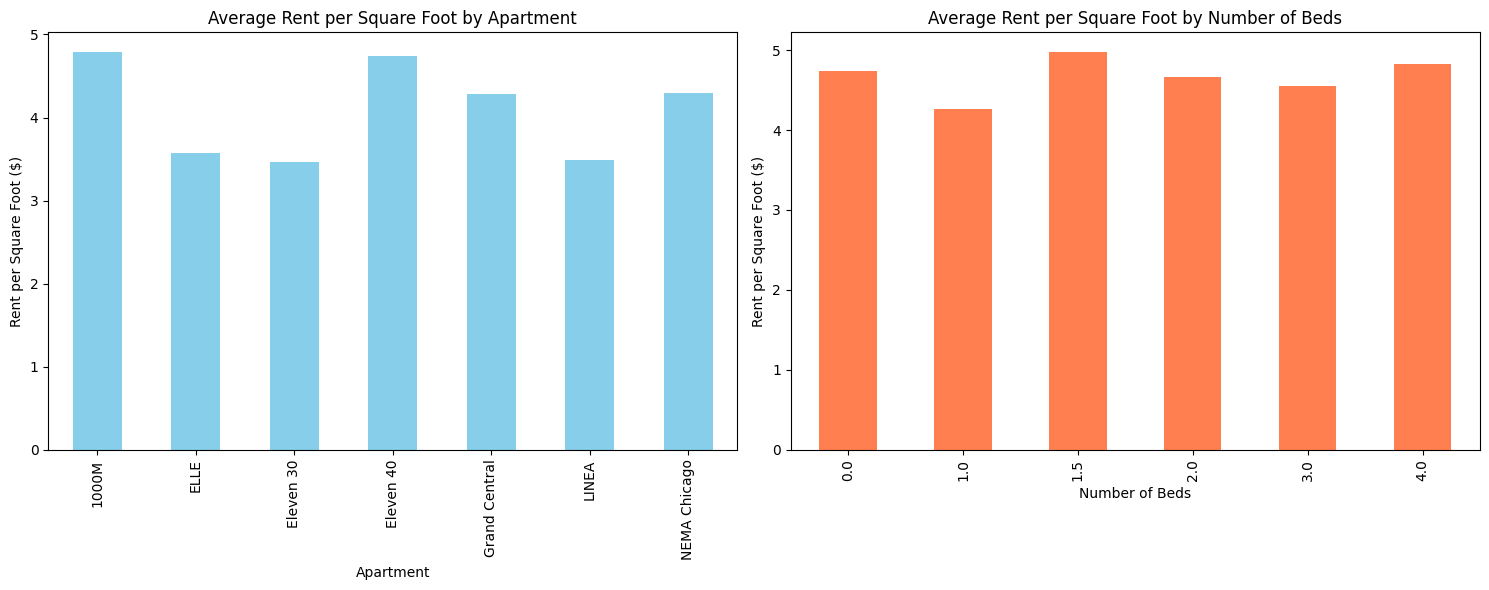

In [11]:
# 4. Rent per Square Foot for Each Apartment and Each Beds
# Calculate rent per square foot
df['rent_per_sqft'] = df['rent'] / df['sqft']

# Rent per square foot by apartment
rent_per_sqft_by_apartment = df.groupby('apartment')['rent_per_sqft'].mean()

# Rent per square foot by beds
rent_per_sqft_by_beds = df.groupby('beds')['rent_per_sqft'].mean()

# Creating plots for rent per square foot by apartment and beds
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Rent per Square Foot by Apartment
rent_per_sqft_by_apartment.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Average Rent per Square Foot by Apartment')
ax[0].set_xlabel('Apartment')
ax[0].set_ylabel('Rent per Square Foot ($)')

# Rent per Square Foot by Beds
rent_per_sqft_by_beds.plot(kind='bar', ax=ax[1], color='coral')
ax[1].set_title('Average Rent per Square Foot by Number of Beds')
ax[1].set_xlabel('Number of Beds')
ax[1].set_ylabel('Rent per Square Foot ($)')

plt.tight_layout()
plt.show()


In [12]:
# median price over time